In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset=pd.read_csv('labeled_data.csv')

In [4]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [6]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
dataset["label"] = dataset["class"].map({0:"Hate Speech",
                                        1:"Offensive speech",
                                        2:"NO hate speech"})

In [7]:
data=dataset[["tweet","label"]]

In [8]:
data

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,NO hate speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive speech
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive speech
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive speech
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive speech
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive speech
24779,"you've gone and broke the wrong heart baby, an...",NO hate speech
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive speech
24781,youu got wild bitches tellin you lies,Offensive speech


In [9]:
import re,nltk,string
from nltk.corpus import stopwords

In [10]:
stopwords=set(stopwords.words("english"))

In [11]:
stemmer=nltk.SnowballStemmer("english")

In [12]:
def clean_data(text):
    text=str(text).lower()
    text=re.sub("https?://\S+|www\.S+",'',text)
    text=re.sub("\[,*?\]",'',text)
    text=re.sub("<.*?>+","",text)
    text=re.sub("\n",'',text)
    text=re.sub('[%s]' %re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*",'',text)
    text=[word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text=[stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text




<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_15773/3980068621.py:3: SyntaxWarning: invalid escape sequence '\S'
  text=re.sub("https?://\S+|www\.S+",'',text)
/tmp/ipykernel_15773/3980068621.py:4: SyntaxWarning: invalid escape sequence '\['
  text=re.sub("\[,*?\]",'',text)
/tmp/ipykernel_15773/3980068621.py:8: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub("\w*\d\w*",'',text)


In [13]:
data["tweet"]=data["tweet"].apply(clean_data)

/tmp/ipykernel_15773/2823468588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean_data)


In [14]:
data

,tweet,label
0,rt mayasolov woman shouldnt complain clean ho...,NO hate speech
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive speech
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive speech
3,rt cganderson vivabas look like tranni,Offensive speech
4,rt shenikarobert shit hear might true might f...,Offensive speech
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive speech
24779,youv gone broke wrong heart babi drove redneck...,NO hate speech
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive speech
24781,youu got wild bitch tellin lie,Offensive speech


In [28]:
x=np.array(data["tweet"])
y=np.array(data["label"])

In [29]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [31]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [32]:
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 197881 stored elements and shape (24783, 25693)>

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [34]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 132634 stored elements and shape (16604, 25693)>

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=dt.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [52]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 148,   34,  283],
       [  33, 1124,  222],
       [ 228,  206, 5901]])

In [53]:
import seaborn as sn
import matplotlib.pyplot as plt


In [57]:
sn.heatmap(cm,annot=True,fmt=".1f",cmap="YlGnBu")

<Axes: >

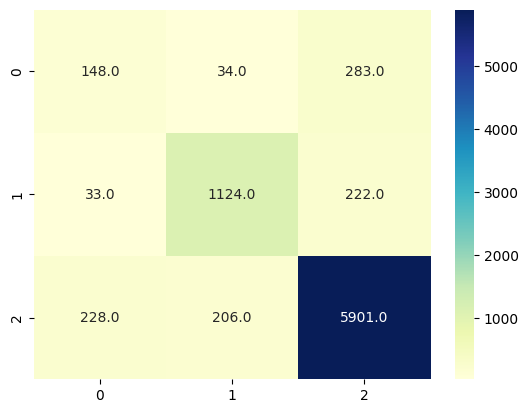

In [58]:
plt.show()

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test,y_pred)

0.8770020784937034

In [69]:
sample = "shit happens"
sample=clean_data(sample)

In [70]:
sample

'shit happen'

In [71]:
data=cv.transform([sample]).toarray()
data

array([[0, 0, 0, ..., 0, 0, 0]])

In [72]:
dt.predict(data)

array(['Offensive speech'], dtype=object)